In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasai

In [2]:
#loading data from csv file to dataframe
df = pd.read_csv('Mobile Payments.csv')
df.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
0,2023,May,334726,77.34,205.88,670.44
1,2023,April,329968,75.96,194.95,615.25
2,2023,March,321149,73.72,204.83,645.80
3,2023,February,323613,74.04,184.82,578.09
4,2023,January,319079,74.41,198.31,589.30
5,2022,December,317983,73.12,207.01,708.06
6,2022,November,315240,73.22,190.46,639.84
7,2022,October,311957,73.22,196.93,646.50
8,2022,September,308799,71.67,189.70,674.47
9,2022,August,310450,70.06,184.81,677.36


In [3]:
#checking if there are any null values
df.isna().sum()

Year                                                 0
Month                                                0
Active Agents                                        0
Total Registered Mobile Money Accounts (Millions)    0
Total Agent Cash in Cash Out (Volume Million)        0
Total Agent Cash in Cash Out (Value KSh billions)    0
dtype: int64

In [4]:
#checking for the datatypes in the dataframe
df.dtypes

Year                                                   int64
Month                                                 object
Active Agents                                          int64
Total Registered Mobile Money Accounts (Millions)    float64
Total Agent Cash in Cash Out (Volume Million)        float64
Total Agent Cash in Cash Out (Value KSh billions)    float64
dtype: object

In [5]:
#checking for dataset info
df.info()
print("----------------------------------------------")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Year                                               195 non-null    int64  
 1   Month                                              195 non-null    object 
 2   Active Agents                                      195 non-null    int64  
 3   Total Registered Mobile Money Accounts (Millions)  195 non-null    float64
 4   Total Agent Cash in Cash Out (Volume Million)      195 non-null    float64
 5   Total Agent Cash in Cash Out (Value KSh billions)  195 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.3+ KB
----------------------------------------------


,Year,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2014.794872,138882.548718,32.666168,92.778646,254.388035
std,4.714419,102812.520762,22.410557,63.896031,198.166854
min,2007.000000,307.000000,0.020992,0.021714,0.064391
25%,2011.000000,38343.000000,17.611300,32.577750,87.542150
50%,2015.000000,129218.000000,26.333000,89.902400,227.921000
75%,2019.000000,222345.000000,51.203900,150.445500,358.315500
max,2023.000000,334726.000000,77.340000,207.010000,722.520000


From observing the data the columns Active Agents and Total Mobile Money Users only show the total number so i will be adding colums to show the number of new agents and number of new mobile money users per month

In [6]:
#defining an order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


#converting the Month column to a categorical type with the defined order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df.reset_index(drop=True, inplace=True)

#sorting the dataframe by Year and Month
df = df.sort_values(by=['Year','Month'])

df.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions)
194,2007,March,307,0.020992,0.021714,0.064391
193,2007,April,362,0.054944,0.070000,0.220896
192,2007,May,447,0.107733,0.150000,0.483709
191,2007,June,527,0.175652,0.233661,0.720102
190,2007,July,681,0.268499,0.354298,1.065370
189,2007,August,819,0.432555,0.516239,1.579910
188,2007,September,960,0.635761,0.669689,2.069690
187,2007,October,1196,0.875962,0.958908,2.829550
186,2007,November,1379,1.133200,1.221740,3.514950
185,2007,December,1582,1.345270,1.274100,3.770270


In [7]:
#calculating new active agents for each month
df['New Monthly Agents'] = df['Active Agents'].diff().fillna(0)

#calculating new mobile money accounts for each month
df['New Monthly Mobile Money Accounts'] = (df['Total Registered Mobile Money Accounts (Millions)'].diff().fillna(0)) * 1000000

df.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts
194,2007,March,307,0.020992,0.021714,0.064391,0.0,0.0
193,2007,April,362,0.054944,0.070000,0.220896,55.0,33952.0
192,2007,May,447,0.107733,0.150000,0.483709,85.0,52789.0
191,2007,June,527,0.175652,0.233661,0.720102,80.0,67919.0
190,2007,July,681,0.268499,0.354298,1.065370,154.0,92847.0
189,2007,August,819,0.432555,0.516239,1.579910,138.0,164056.0
188,2007,September,960,0.635761,0.669689,2.069690,141.0,203206.0
187,2007,October,1196,0.875962,0.958908,2.829550,236.0,240201.0
186,2007,November,1379,1.133200,1.221740,3.514950,183.0,257238.0
185,2007,December,1582,1.345270,1.274100,3.770270,203.0,212070.0


Dividing the dataset to three periods, '2007-2011', '2012-2018', '2019-2023'

I'll be naming them period_one, period_two and period_three respectively

In [8]:
period_one = df[(df['Year'] >= 2007) & (df['Year'] <= 2011)]
period_one = pd.DataFrame(period_one)
period_one.head(10)


,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts
194,2007,March,307,0.020992,0.021714,0.064391,0.0,0.0
193,2007,April,362,0.054944,0.070000,0.220896,55.0,33952.0
192,2007,May,447,0.107733,0.150000,0.483709,85.0,52789.0
191,2007,June,527,0.175652,0.233661,0.720102,80.0,67919.0
190,2007,July,681,0.268499,0.354298,1.065370,154.0,92847.0
189,2007,August,819,0.432555,0.516239,1.579910,138.0,164056.0
188,2007,September,960,0.635761,0.669689,2.069690,141.0,203206.0
187,2007,October,1196,0.875962,0.958908,2.829550,236.0,240201.0
186,2007,November,1379,1.133200,1.221740,3.514950,183.0,257238.0
185,2007,December,1582,1.345270,1.274100,3.770270,203.0,212070.0


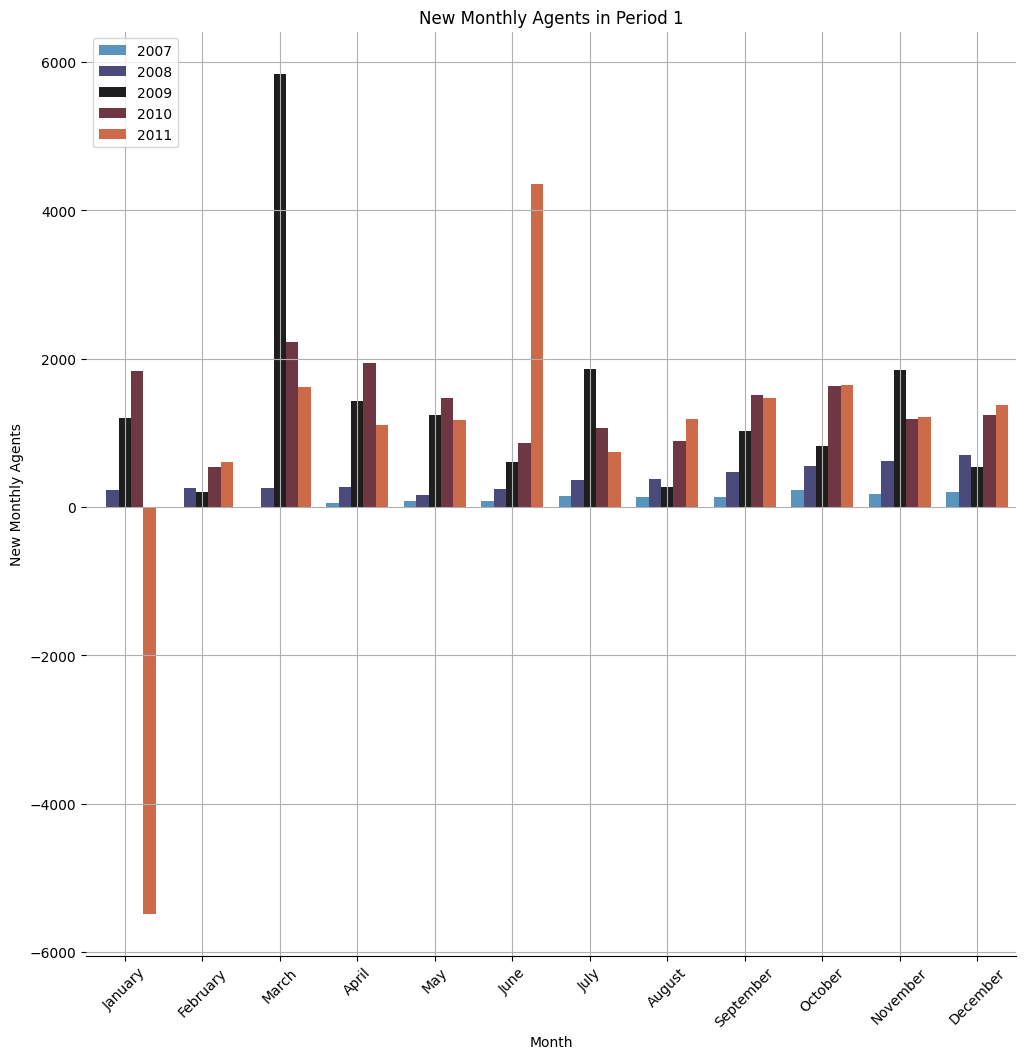

In [9]:
#visualizing the growth of Active Agents

#setting the figure size
plt.figure(figsize=(12,12))

# Define a custom color palette
custom_palette = sns.color_palette("icefire", n_colors=len(period_one['Year'].unique()))

# Set the palette for the plot
sns.set_palette(custom_palette)

#creating a lineplot
ax = sns.barplot(x="Month", y="New Monthly Agents", hue="Year", data=period_one, palette=custom_palette) 
plt.title("New Monthly Agents in Period 1")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
sns.despine(left=True)
plt.legend(loc='upper left')
plt.xlabel("Month")
plt.ylabel("New Monthly Agents")
plt.xticks(rotation=45)

sns.set_style("darkgrid")
plt.grid(True)

plt.show()



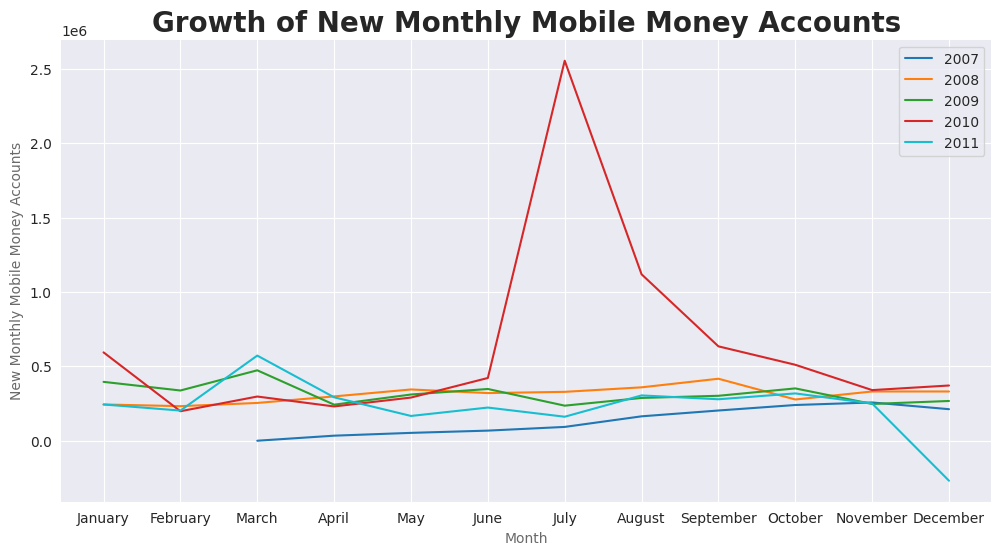

In [10]:
#visualizing the growth of registered mobile money accounts

#setting the figure size
plt.figure(figsize=(12,6))

#defining color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#17becf']

#creating the plot
sns.lineplot(x="Month", y="New Monthly Mobile Money Accounts", hue="Year", data=period_one, palette=colors)
plt.title("Growth of New Monthly Mobile Money Accounts", fontdict={'fontsize':20, 'fontweight':'bold'})
sns.despine(left=True)
plt.legend(loc='upper right')
plt.xlabel("Month", color='dimgray')
plt.ylabel("New Monthly Mobile Money Accounts", color='dimgray')
plt.grid(True)

sns.set_context('paper')
sns.set_style('whitegrid')

plt.show()

In [11]:
#calculating how many active agents are there annually
annual_agents = period_one.groupby('Year')['New Monthly Agents'].sum().reset_index()

#merging into period one
period_one = pd.merge(period_one, annual_agents, on='Year', suffixes=('', '_Annual'))

#renaming the column
period_one.rename(columns={'New Monthly Agents_Annual':'Annual Agents'}, inplace=True)

period_one.head(10)


,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts,Annual Agents
0,2007,March,307,0.020992,0.021714,0.064391,0.0,0.0,1275.0
1,2007,April,362,0.054944,0.070000,0.220896,55.0,33952.0,1275.0
2,2007,May,447,0.107733,0.150000,0.483709,85.0,52789.0,1275.0
3,2007,June,527,0.175652,0.233661,0.720102,80.0,67919.0,1275.0
4,2007,July,681,0.268499,0.354298,1.065370,154.0,92847.0,1275.0
5,2007,August,819,0.432555,0.516239,1.579910,138.0,164056.0,1275.0
6,2007,September,960,0.635761,0.669689,2.069690,141.0,203206.0,1275.0
7,2007,October,1196,0.875962,0.958908,2.829550,236.0,240201.0,1275.0
8,2007,November,1379,1.133200,1.221740,3.514950,183.0,257238.0,1275.0
9,2007,December,1582,1.345270,1.274100,3.770270,203.0,212070.0,1275.0


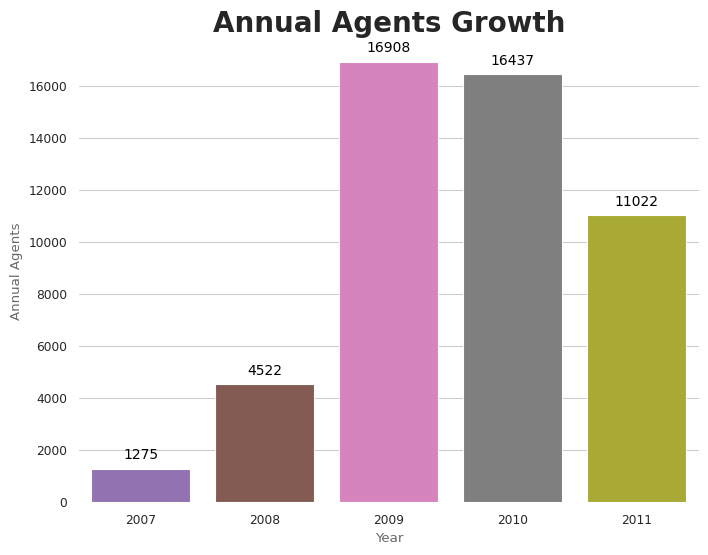

In [12]:
muted_color = 'dimgray'

# Convert 'Year' column to integer
period_one['Year'] = period_one['Year'].astype(int)

#visualizing the growth of agents annually

plt.figure(figsize=(8,6))

#defining color palette
colors = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
sns.set_palette(sns.color_palette(colors))


ax = sns.barplot(x='Year', y='Annual Agents', data=period_one)

for bar in ax.patches:
    ax.annotate(int(bar.get_height()),
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),fontsize=10, color='Black',
                textcoords = 'offset points')
    
#mute label color
ax.set_xlabel('Year', color=muted_color)
ax.set_ylabel('Annual Agents', color=muted_color)
#ax.tick_params(axis='x', colors=muted_color)
#ax.tick_params(axis='y', colors=muted_color)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)



sns.despine(left=True, right=True, top=True, bottom=True)
sns.set_style('whitegrid')
sns.set_context('paper')
#plt.grid(True)
plt.title('Annual Agents Growth', fontdict={'fontsize':20, 'fontweight':'bold'})
plt.show()

In [13]:
#calculating the annual number of registered monile money accounts

annual_mobile_money_users = period_one.groupby('Year')['New Monthly Mobile Money Accounts'].sum().reset_index()

#merging into period one
period_one = pd.merge(period_one, annual_mobile_money_users, on='Year', suffixes=('', '_Annual'))


#renaming the column
period_one.rename(columns={'New Monthly Mobile Money Accounts_Annual':'Annual Mobile Money Accounts'}, inplace=True)

period_one.head(10)

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts,Annual Agents,Annual Mobile Money Accounts
0,2007,March,307,0.020992,0.021714,0.064391,0.0,0.0,1275.0,1324278.0
1,2007,April,362,0.054944,0.070000,0.220896,55.0,33952.0,1275.0,1324278.0
2,2007,May,447,0.107733,0.150000,0.483709,85.0,52789.0,1275.0,1324278.0
3,2007,June,527,0.175652,0.233661,0.720102,80.0,67919.0,1275.0,1324278.0
4,2007,July,681,0.268499,0.354298,1.065370,154.0,92847.0,1275.0,1324278.0
5,2007,August,819,0.432555,0.516239,1.579910,138.0,164056.0,1275.0,1324278.0
6,2007,September,960,0.635761,0.669689,2.069690,141.0,203206.0,1275.0,1324278.0
7,2007,October,1196,0.875962,0.958908,2.829550,236.0,240201.0,1275.0,1324278.0
8,2007,November,1379,1.133200,1.221740,3.514950,183.0,257238.0,1275.0,1324278.0
9,2007,December,1582,1.345270,1.274100,3.770270,203.0,212070.0,1275.0,1324278.0


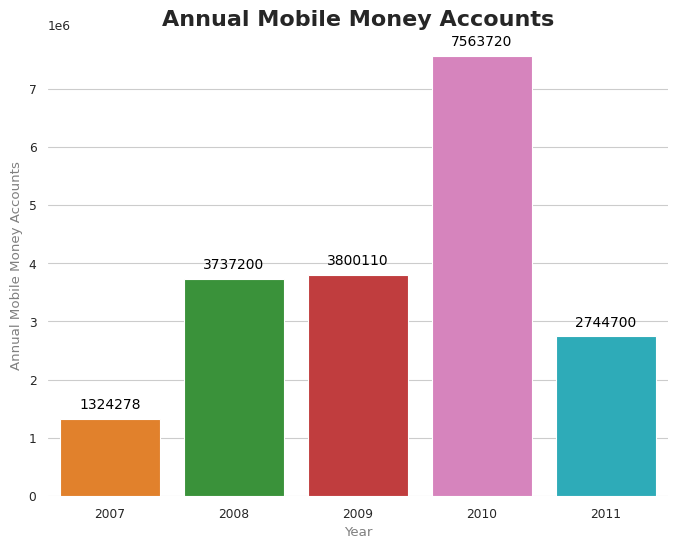

In [14]:
#visualizing the annual growth of registered mobile money accounts
plt.figure(figsize=(8,6))

#defining color palette
colors = ['#ff7f0e', '#2ca02c', '#d62728',  '#e377c2',  '#17becf']
sns.set_palette(sns.color_palette(colors))


ax = sns.barplot(x='Year', y='Annual Mobile Money Accounts', data=period_one)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center',
                va='center', fontsize=10, color='black',
                xytext=(0, 10), textcoords='offset points')
    
ax.set_xlabel('Year', color='gray')
ax.set_ylabel('Annual Mobile Money Accounts', color='gray')


sns.despine(left=True, right=True, bottom=True)
sns.set_style('whitegrid')
plt.title('Annual Mobile Money Accounts',  fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

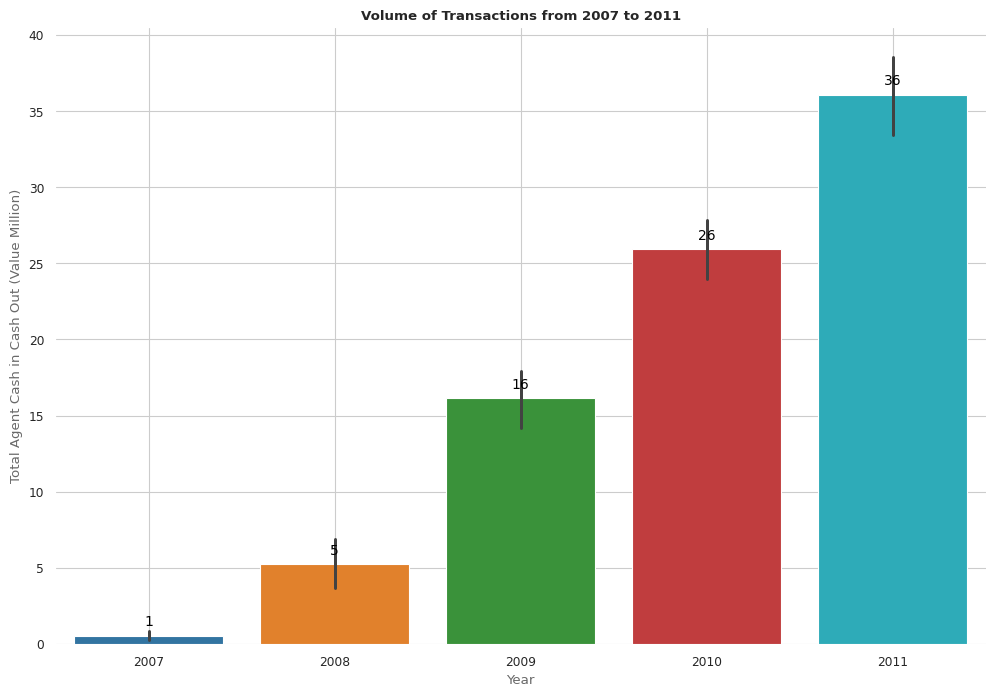

In [15]:
#visualizing the volume of transaction
muted_color='dimgray'
#setting the figure size
plt.figure(figsize=(12,8))

#defining the color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#17becf']
sns.set_palette(sns.color_palette(colors))

ax = sns.barplot(x='Year', y='Total Agent Cash in Cash Out (Volume Million)',
                data=period_one)


for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center',
                va='center', fontsize=10, color='black',
                xytext=(0, 10), textcoords='offset points')
    
#mute label color
ax.set_xlabel('Year', color=muted_color)
ax.set_ylabel('Total Agent Cash in Cash Out (Value Million)', color=muted_color)
    

sns.despine(left=True, right=True, bottom=True)
sns.set_style('whitegrid')
sns.set_context('paper')

plt.title("Volume of Transactions from 2007 to 2011", fontdict={'fontweight':'bold'})


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(True)
plt.show()


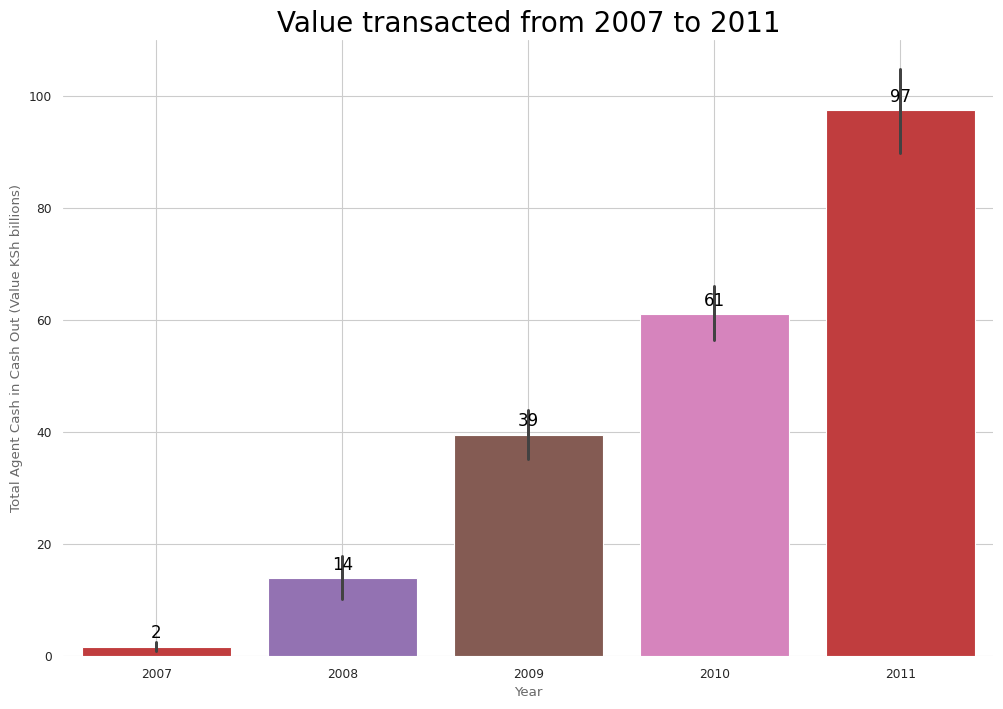

In [16]:
#visualizing the value of transactions from 2007 to 2011

period_one['Year'] = period_one['Year'].astype(int)
muted_color = 'dimgray'

#setting the figure size
plt.figure(figsize=(12,8))

#defining the colors
colors = ['#d62728', '#9467bd', '#8c564b', '#e377c2']

ax = sns.barplot(x='Year', y='Total Agent Cash in Cash Out (Value KSh billions)',
                data=period_one, palette=colors,
                edgecolor=None)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center',
                va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')
    
#muting the label color
ax.set_xlabel('Year', color=muted_color)
ax.set_ylabel('Total Agent Cash in Cash Out (Value KSh billions)', color=muted_color)

#setting the title
plt.title('Value transacted from 2007 to 2011', color='black', fontsize=20)

sns.despine(left=True, right=True, bottom=True)
#sns.set_style('whitegrid')
#sns.set_context('paper', font_scale=1.5)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(True)

plt.show()

Text(0, 0.5, 'Total Agent Cash in Cash Out (Value KSh billions)')

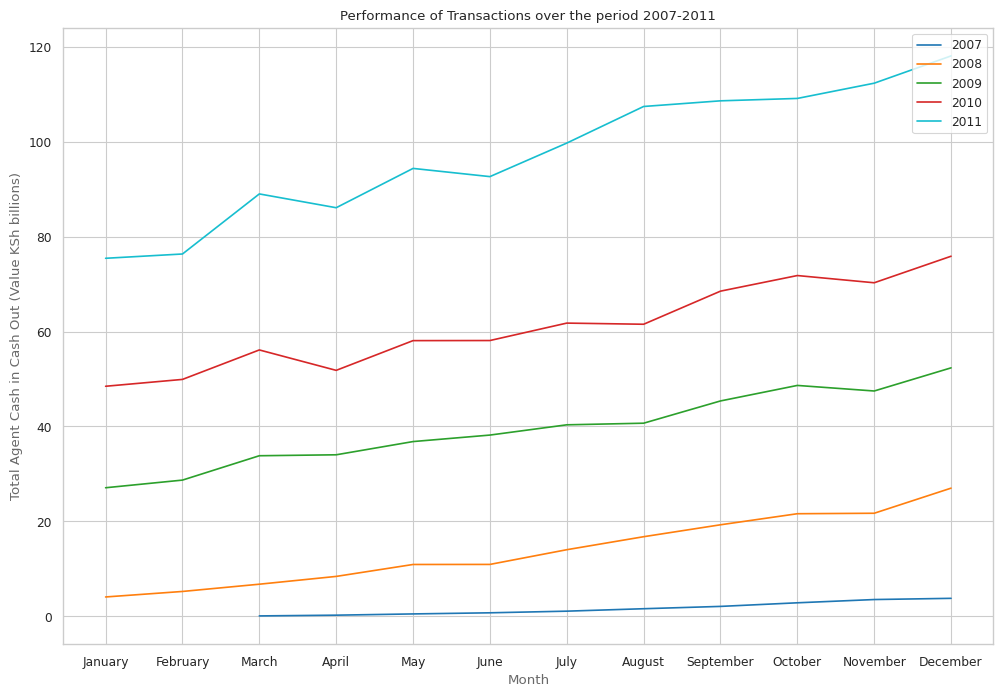

In [17]:
#visualizing perfomance of transactions over months during the period

#setting the figure size
plt.figure(figsize=(12,8))

#defining the color palettes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#17becf']

#creating the plot
sns.lineplot(x="Month", y="Total Agent Cash in Cash Out (Value KSh billions)",
                  hue="Year", data=period_one, palette=colors)
plt.title("Performance of Transactions over the period 2007-2011")
plt.legend(loc='upper right')
plt.xlabel("Month", color='dimgray')
plt.ylabel("Total Agent Cash in Cash Out (Value KSh billions)", color='dimgray')


In [18]:
period_one.columns
period_one.dtypes

Year                                                    int64
Month                                                category
Active Agents                                           int64
Total Registered Mobile Money Accounts (Millions)     float64
Total Agent Cash in Cash Out (Volume Million)         float64
Total Agent Cash in Cash Out (Value KSh billions)     float64
New Monthly Agents                                    float64
New Monthly Mobile Money Accounts                     float64
Annual Agents                                         float64
Annual Mobile Money Accounts                          float64
dtype: object

# PERIOD 2

In [19]:
period_two = df[(df["Year"] >= 2012) & (df['Year'] <= 2018)]
period_two = pd.DataFrame(period_two)
period_two

,Year,Month,Active Agents,Total Registered Mobile Money Accounts (Millions),Total Agent Cash in Cash Out (Volume Million),Total Agent Cash in Cash Out (Value KSh billions),New Monthly Agents,New Monthly Mobile Money Accounts
136,2012,January,52315,18.8340,40.2449,114.060,1844.0,-357000.0
135,2012,February,53685,18.7921,41.7805,116.691,1370.0,-41900.0
134,2012,March,55726,19.2393,45.7570,126.093,2041.0,447200.0
133,2012,April,56717,19.5300,44.3500,117.360,991.0,290700.0
132,2012,May,59057,19.6943,47.9655,128.403,2340.0,164300.0
...,...,...,...,...,...,...,...,...
57,2018,August,202627,43.5588,149.5170,348.912,2400.0,945800.0
56,2018,September,203359,44.2723,145.9880,327.663,732.0,713500.0
55,2018,October,211961,45.4371,155.1600,343.225,8602.0,1164800.0
54,2018,November,206312,46.2334,153.1500,343.866,-5649.0,796300.0


In [23]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Filter data for the selected years
years = [2018, 2019, 2020, 2021, 2022]
df_filtered = df[df['Year'].isin(years)]

# Create a figure with initial layout
fig = go.Figure(
    layout=go.Layout(
        xaxis=dict(range=[2017, 2023], autorange=False),
        yaxis=dict(range=[150000, 350000], autorange=False),
        title="Active Agents by Year",
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None])])]
    )
)

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    'xaxis_title': 'Year',
    'yaxis_title': "Active Agents"
})

# Initialize traces for each year
traces = []
for year in years:
    df_year = df_filtered[df_filtered['Year'] == year]
    trace = go.Scatter(
        x=df_year['Year'],
        y=df_year['Active Agents'],
        name=str(year),
        visible=True,
        line=dict(color="#33CFA5"),
    )
    traces.append(trace)

# Add initial traces to the figure
for trace in traces:
    fig.add_trace(trace)

# Create animation frames
frames = []
for k in range(1, len(df_filtered) + 1):
    frame_data = []
    for trace in traces:
        year_data = trace.y[:k]
        new_trace = go.Scatter(
            x=[trace.x[0]] * len(year_data),
            y=year_data,
            line=dict(color=trace.line.color)
        )
        frame_data.append(new_trace)
    frame = go.Frame(data=frame_data)
    frames.append(frame)

# Add frames to the figure
fig.frames = frames

# Extra Formatting
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='white', ticklen=10)
fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='white', ticklen=1)
fig.update_layout(legend=dict(x=0, y=1.1), legend_orientation="h")

# Show the figure
pyo.plot(fig)



'temp-plot.html'

In [21]:
#saving dataframe as csv
df.to_csv('data.csv')